# Введение в ансамбли: бэггинг. Случайный лес

✍ Одна модель хорошо, а много — лучше! С этой фразы мы с вами приоткрываем дверь в удивительный мир ансамблевых моделей.

**Ансамблевые модели** или просто **ансамбли (ensembles)** — это метод машинного обучения, где несколько простых моделей (часто называемых «слабыми учениками») обучаются для решения одной и той же задачи и объединяются для получения лучших результатов.

Необходимость использования ансамблей может возникнуть тогда, когда вы уже нашли хорошую модель и никак больше не можете повысить её качество. В этом случае можно перейти к более продвинутому методу: использовать не одну модель (пусть и очень хорошую), а ансамбли моделей.

Ансамбли — передовые алгоритмы для решения сложных задач машинного обучения. Сегодня они и нейронные сети являются главными конкурентами и дают наилучшие результаты, благодаря чему используются крупными компаниями в продакшене.

→ В этом модуле мы коснёмся основой идеи использования ансамблей на примере бэггинга и посмотрим на его реализацию для решения задач классификации в библиотеке sklearn, а в дальнейшем разберёмся, что за математическая «магия» стоит за ансамблевыми методами.

Говоря простыми словами, ансамбли — это объединение простых моделей в одного гиганта. Но объединять модели можно как угодно: например, взять тысячу разных логистических регрессий, а затем на их предсказаниях построить дерево решений, линейную регрессию или вообще нейронную сеть. А можно обучить сотню деревьев решений — построить целый лес, а для предсказания взять среднее. Вариаций объединения может быть сколько угодно.

Существует **три проверенных способа построения ансамблей:**

- **Бэггинг** — параллельно обучаем множество одинаковых моделей, а для предсказания берём среднее по предсказаниям каждой из моделей.
- **Бустинг** — последовательно обучаем множество одинаковых моделей, где каждая новая модель концентрируется на тех примерах, где предыдущая допустила ошибку.
- **Стекинг** — параллельно обучаем множество разных моделей, отправляем их результаты в финальную модель, и уже она принимает решение.

Об ансамблях типов бустинг и стекинг мы поговорим чуть позже в модуле, посвящённом продвинутым методам машинного обучения. В этом модуле разберёмся, что из себя представляет бэггинг и причём тут деревья решений.

## БЭГГИНГ. ОСНОВНЫЕ ИДЕИ

В 1906 г. в городе Плимут (Великобритания) на сельской ярмарке был проведён эксперимент. [Фрэнсис Гальтон](https://ru.wikipedia.org/wiki/%D0%93%D0%B0%D0%BB%D1%8C%D1%82%D0%BE%D0%BD,_%D0%A4%D1%80%D1%8D%D0%BD%D1%81%D0%B8%D1%81) в качестве развлечения посетителей ярмарки предложил им на глаз оценить вес выставленного на всеобщее обозрение быка. За правильные ответы организаторы шоу обещали призы. В результате в голосовании приняли участие около 800 человек — как заядлых фермеров, так и людей, далёких от скотоводческих дел. Собрав после этой ярмарки все результаты, Гальтон высчитал среднее арифметическое значение для всей выборки — 1197 фунтов. Реальный же вес быка оказался 1198 фунтов. Каким-то непостижимым образом разношерстная публика дала ответ, максимально приближенный к реальному показателю. То есть ответ публики был точнее, чем ответ отдельно взятого эксперта, например мясника или скотовода.

По схожему принципу «голосования толпы» и работает бэггинг.

**Бэггинг (bagging)** — это алгоритм построения ансамбля путём параллельного обучения множества независимых друг от друга моделей.

В основе алгоритма лежит статистический метод, который называется **бутстрэпом (bootstrap)**. Идея бутстрэпа заключается в генерации ***k*** выборок размера ***n*** (бутстрэп-выборок) из исходного набора данных размера ***m*** путём случайного выбора элементов с повторениями в каждом из наблюдений. 

Схематично работу метода можно представить следующим образом:

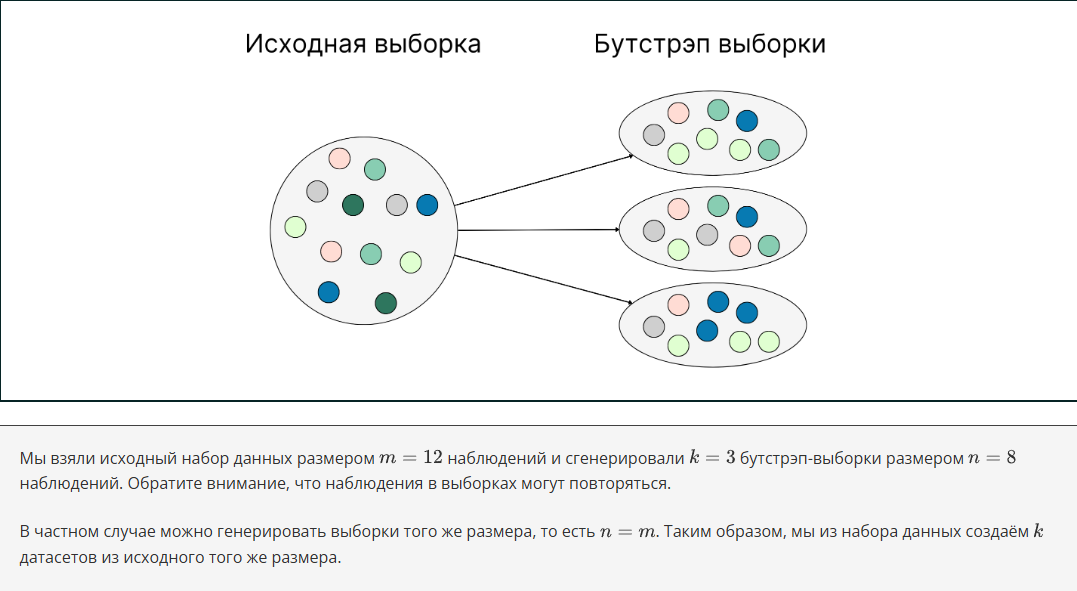

**Примечание.** Такие бутстрэп-выборки часто используются для оценки различных статистических показателей (например, разброса или доверительного интервала). Если вычислять статистические оценки на нескольких независимых выборках, то мы можем оценить их разброс. Поиск большого количества независимых выборок сложен в силу того, что для этого требуется слишком много данных. Поэтому мы используем бутстрэп, чтобы создать несколько выборок.

Давайте обучим ***k*** одинаковых моделей на каждой из сгенерированных выборок, сделаем предсказания, а затем усредним их. Так мы получим бэггинг.

Схематично такой подход можно описать следующим образом:

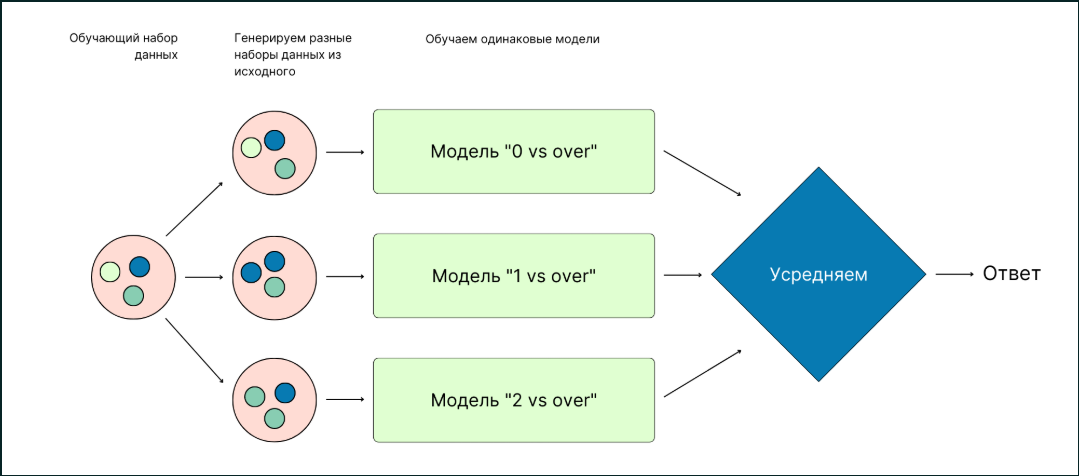

**Примечание.** В случае классификации «усреднение» означает мажоритарное голосование (принцип большинства голосов). То есть объект относится к тому классу, за который проголосовало большинство алгоритмов.

Важно отметить, что в бэггинге в голосовании принимает участие модель одного вида. Эта модель называется **базовой моделью (base model).** Нельзя обучить на половине сгенерированных наборов данных логистические регрессии, а на второй половине — деревья решений.

Когда мы будем разбирать математическое обоснование ансамблей, мы докажем следующие два утверждения:

Смещение (bias) бэггинг-ансамбля не больше (***<=***) смещения одного алгоритма из этого ансамбля.
Однако разброс (variance) бэггинг-ансамбля в ***k*** раз меньше, чем разброс одного алгоритма из ансамбля, где ***k*** — количество алгоритмов в ансамбле.

**Что это значит в переводе с математического?**

Теорема гарантирует, что средняя ошибка ансамбля, построенного по принципу бэггинга, не выше, чем средняя ошибка базовой модели, но при этом шанс переобучения алгоритма значительно ниже.

Это очень важно для моделей, склонных к переобучению, таких как глубокие деревья решений.

### Задание 7.1

У нас есть выборка [A,B,C,D,E,F], и мы хотим использовать бэггинг для обучения моделей на этой выборке. Какие бутстрэп-выборки размера 6 могли бы получиться из неё?

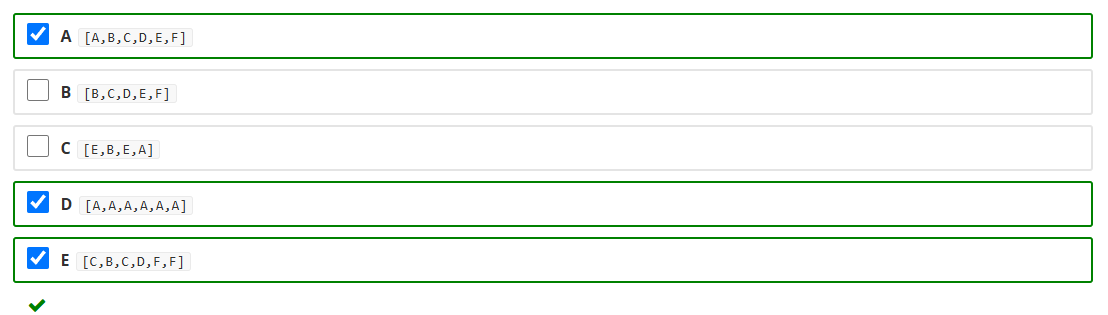

### Задание 7.2

В чём состоит главное преимущество бэггинга перед использованием одной базовой модели?

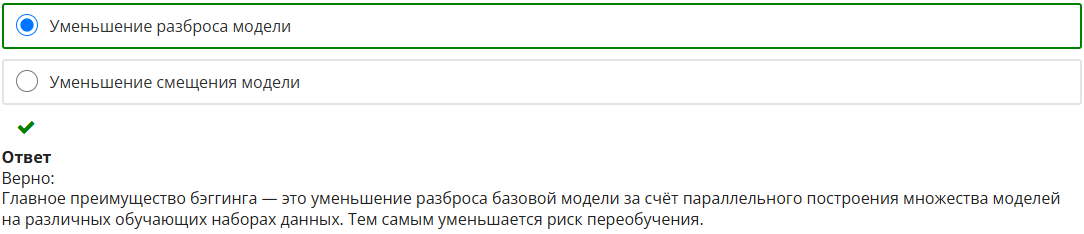

## СЛУЧАЙНЫЙ ЛЕС

**Случайный лес (Random Forest)** — это самая распространённая реализация бэггинга, основанная на использовании в качестве базовой модели дерева решений.

Помимо бутстрэпа, случайный лес использует [метод случайных подпространств.](https://en.wikipedia.org/wiki/Random_subspace_method) Суть этого метода заключается в том, что каждая модель обучается не на всех признаках, а только на части из них. Такой подход позволяет уменьшить коррелированность между ответами деревьев и сделать их независимыми друг от друга.

**Алгоритм построения случайного леса для задачи классификации**

Пусть количество объектов в наборе данных равно N, а количество признаков — M. То есть размер набора данных — (N, M). Количество деревьев в лесу равно K. Тогда для обучения случайного леса необходимо выполнить следующие шаги:

1. С помощью бутстрэпа создать K наборов данных размера (N, M).
2. Для каждого сгенерированного набора данных применить метод случайных подпространств: выбрать L < M случайных признаков и получить K новых наборов данных размером (N, L).
3. На каждом наборе данных обучить дерево решений.

Когда поступят новые данные, нам нужно будет прогнать их через каждое дерево и объединить результаты отдельных деревьев мажоритарным голосованием или путём комбинирования вероятностей.

Ниже приведена схема работы описанного алгоритма для решения задачи классификации. Для простоты лес состоит из четырёх деревьев (K=4).

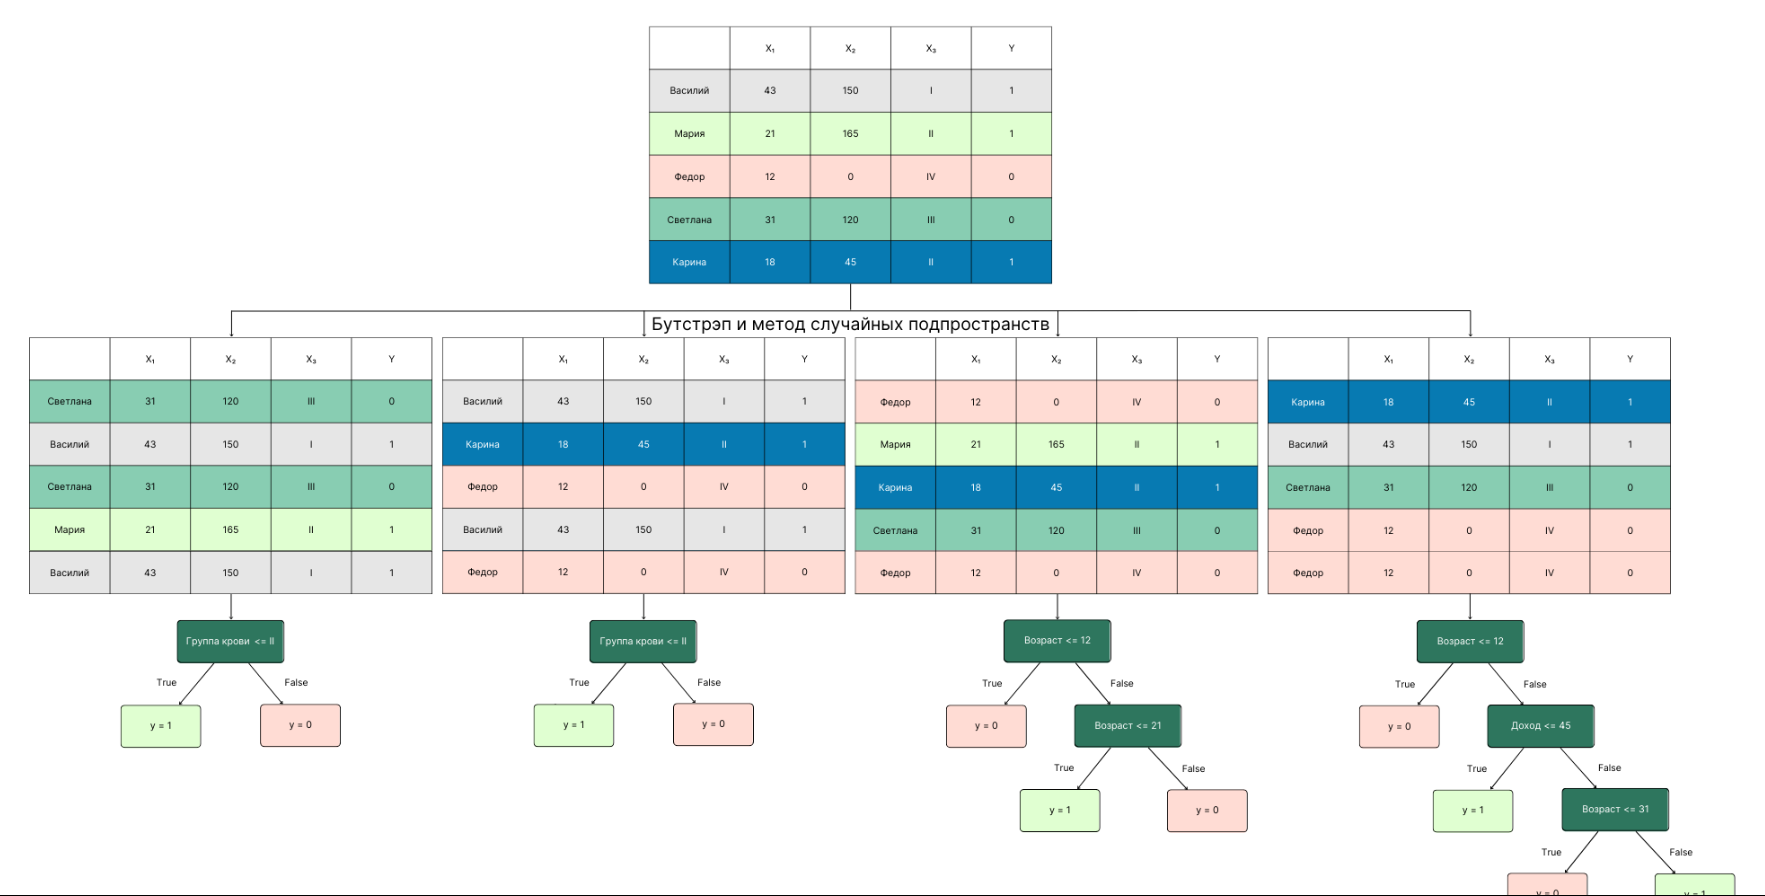
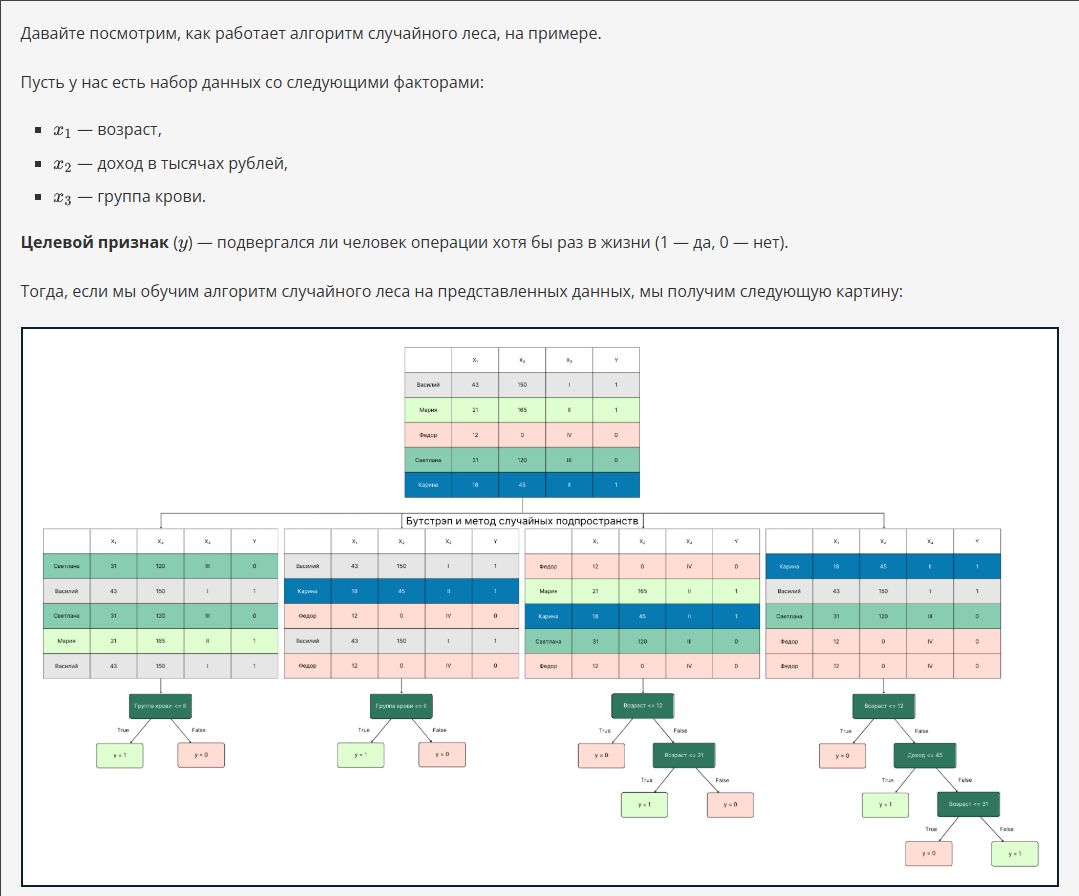
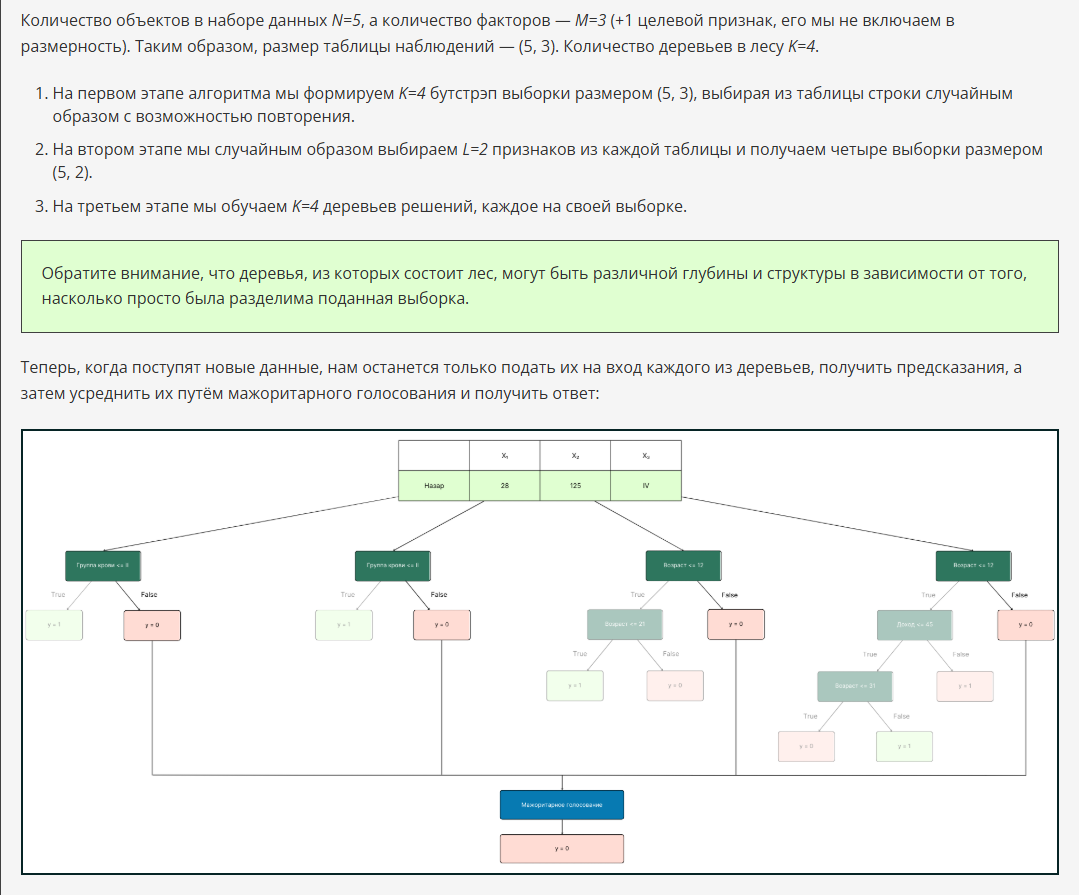

Теперь, когда мы рассмотрели принцип работы случайного леса, давайте посмотрим, как выглядит реализация алгоритма в sklearn. Но перед этим — **пара задач для закрепления материала ↓**

### Задание 7.3

Для чего в модели случайного леса используется метод случайных подпространств?

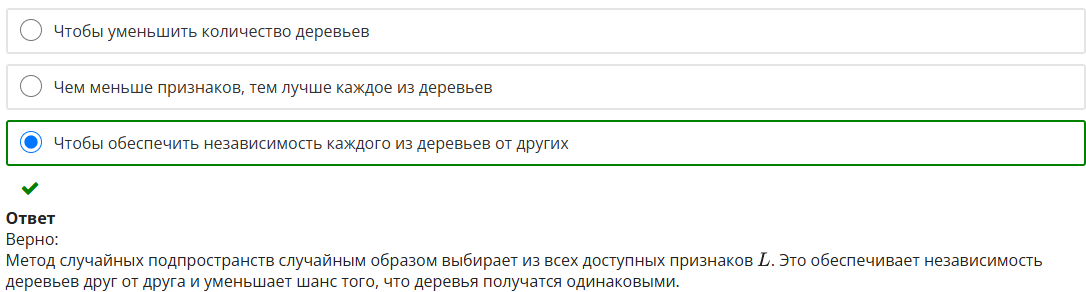

### Задание 7.4

Возьмите модель случайного леса, построенную выше. Предскажите, были ли операции у Игоря, если его:

- возраст — 30,
- группа крови — IV,
- доход в тысячах рублей — 40.

Какую метку класса случайный лес вернёт для Игоря?

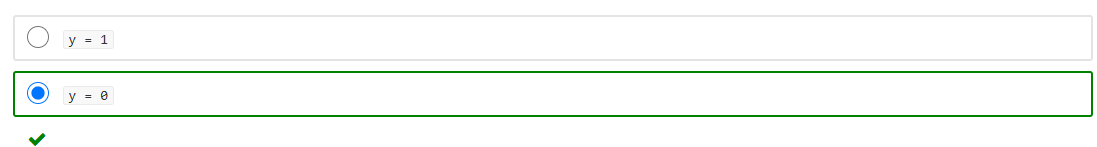